<a href="https://colab.research.google.com/github/peterbabulik/synthetic/blob/main/Q.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install cirq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.7/532.7 kB 30.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.5/60.5 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.3/69.3 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 596.5/596.5 kB 35.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.8/202.8 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 80.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 48.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 64.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 60.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━

Using device: cpu
Initializing Quantum Synthetic AI...
Generating fractal with 300 points...


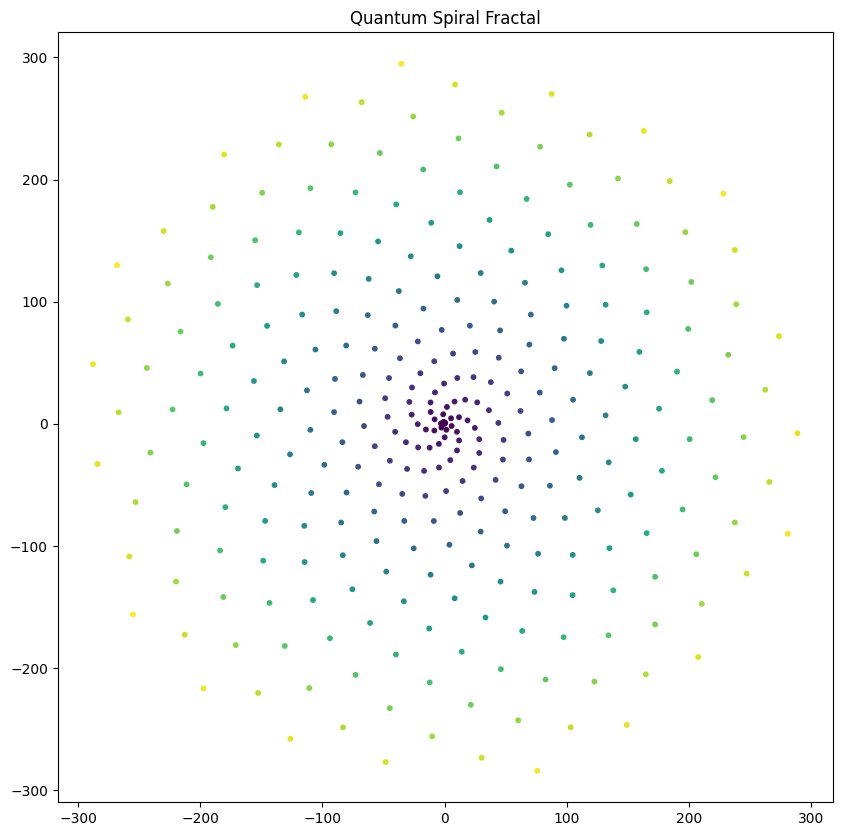

Original data: b'Test'
Encoding data...
Decoding data...
Decoded data: b'\x06\x03\x03\x00'
Training quantum model...
Epoch 0/1000, Loss: 78.0000
Epoch 10/1000, Loss: 77.4575
Epoch 20/1000, Loss: 76.9231
Epoch 30/1000, Loss: 76.4104
Epoch 40/1000, Loss: 79.9506
Epoch 50/1000, Loss: 75.3614
Epoch 60/1000, Loss: 74.8672
Epoch 70/1000, Loss: 74.3545
Epoch 80/1000, Loss: 78.8816
Epoch 90/1000, Loss: 78.6202
Epoch 100/1000, Loss: 72.6987
Epoch 110/1000, Loss: 72.1622
Epoch 120/1000, Loss: 71.6466
Epoch 130/1000, Loss: 77.5543
Epoch 140/1000, Loss: 70.6113
Epoch 150/1000, Loss: 77.0344
Epoch 160/1000, Loss: 69.5303
Epoch 170/1000, Loss: 76.4996
Epoch 180/1000, Loss: 68.5192
Epoch 190/1000, Loss: 68.1093
Epoch 200/1000, Loss: 75.8117
Epoch 210/1000, Loss: 75.5921
Epoch 220/1000, Loss: 75.3524
Epoch 230/1000, Loss: 75.0929
Epoch 240/1000, Loss: 65.6269
Epoch 250/1000, Loss: 74.5374
Epoch 260/1000, Loss: 84.0000
Epoch 270/1000, Loss: 74.0571
Epoch 280/1000, Loss: 63.6132
Epoch 290/1000, Loss: 73

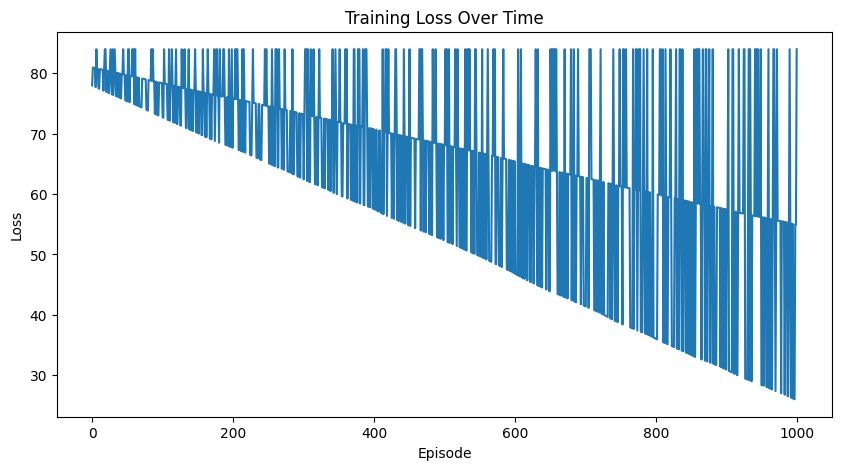

In [6]:
# Install required packages
# !pip install cirq numpy matplotlib torch

import cirq
import numpy as np
import matplotlib.pyplot as plt
import torch
from collections import defaultdict
import time

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

class QuantumSyntheticAI:
    def __init__(self, num_qubits=2):
        self.num_qubits = num_qubits
        self.qubits = cirq.LineQubit.range(num_qubits)
        self.noise_model = cirq.depolarize(p=0.01)

        # Initialize trainable parameters
        self.theta = torch.nn.Parameter(torch.randn(num_qubits, device=device))
        self.quantum_scale = torch.nn.Parameter(torch.tensor([1.0], device=device))

        self.optimizer = torch.optim.Adam([self.theta, self.quantum_scale], lr=0.01)

    def _create_circuit(self, input_data):
        circuit = cirq.Circuit()

        # Encode input data
        binary_data = format(input_data, f'0{self.num_qubits}b')
        for i, bit in enumerate(binary_data):
            if i < self.num_qubits and bit == '1':
                circuit.append(cirq.X(self.qubits[i]))

        # Add parameterized gates
        for i, qubit in enumerate(self.qubits):
            circuit.append([
                cirq.H(qubit),
                cirq.ry(self.theta[i].item())(qubit)
            ])

        # Add measurement
        for i, qubit in enumerate(self.qubits):
            circuit.append(cirq.measure(qubit, key=f'q{i}'))

        return circuit

    def encode_quantum(self, data):
        data_int = int(data) if isinstance(data, (bytes, bytearray)) else data
        circuit = self._create_circuit(data_int)

        noisy_circuit = circuit.with_noise(self.noise_model)
        simulator = cirq.Simulator()
        result = simulator.run(noisy_circuit)

        # Convert measurement results to quantum state representation
        measurements = np.array([result.measurements[f'q{i}'][0] for i in range(self.num_qubits)])
        quantum_state = torch.tensor(measurements, device=device, dtype=torch.float32)

        # Apply trainable scaling
        return self.quantum_scale * quantum_state

    def decode_quantum(self, quantum_state):
        # Convert quantum state back to classical value
        binary_values = torch.pow(2, torch.arange(self.num_qubits, device=device))
        classical_value = torch.sum(quantum_state * binary_values)

        # Ensure the output is within valid byte range
        return torch.clamp(classical_value, 0, 255)

    def forward(self, data_point):
        if isinstance(data_point, (bytes, bytearray)):
            data_point = int.from_bytes(data_point, byteorder='big')

        quantum_state = self.encode_quantum(data_point)
        decoded_value = self.decode_quantum(quantum_state)
        return decoded_value

    def train_step(self, data_point):
        self.optimizer.zero_grad()

        if isinstance(data_point, (bytes, bytearray)):
            data_point = int.from_bytes(data_point, byteorder='big')

        # Forward pass
        output = self.forward(data_point)

        # Compute loss
        target = torch.tensor(float(data_point), device=device)
        loss = torch.abs(output - target)

        # Backward pass
        loss.backward()
        self.optimizer.step()

        return loss.item()

class QuantumSpiralFractal:
    def __init__(self, quantum_ai):
        self.quantum_ai = quantum_ai
        self.points = []

    def generate(self, iterations):
        self.points = [(np.cos(i) * i, np.sin(i) * i) for i in range(iterations)]

    def encode_data(self, data):
        encoded_data = []
        for byte in data:
            quantum_encoded = self.quantum_ai.encode_quantum(byte)
            if len(encoded_data) < len(self.points):
                encoded_data.append((self.points[len(encoded_data)], quantum_encoded))
        return encoded_data

    def decode_data(self, encoded_data):
        decoded_values = [self.quantum_ai.decode_quantum(qdata).item()
                         for _, qdata in encoded_data]
        # Ensure values are integers within byte range
        valid_bytes = [max(0, min(255, int(round(val)))) for val in decoded_values]
        return bytes(valid_bytes)
def plot_spiral_fractal(points):
    plt.figure(figsize=(10, 10))
    x_coords, y_coords = zip(*points)
    plt.scatter(x_coords, y_coords, c=range(len(points)), cmap='viridis', s=10)
    plt.title("Quantum Spiral Fractal")
    plt.axis('equal')
    plt.show()

def main():
    print("Initializing Quantum Synthetic AI...")
    quantum_ai = QuantumSyntheticAI()
    quantum_fractal = QuantumSpiralFractal(quantum_ai)

    iterations = 300
    print(f"Generating fractal with {iterations} points...")
    quantum_fractal.generate(iterations)

    plot_spiral_fractal(quantum_fractal.points)

    test_data = b"Test"
    print(f"Original data: {test_data}")

    print("Encoding data...")
    encoded_data = quantum_fractal.encode_data(test_data)
    print("Decoding data...")
    decoded_data = quantum_fractal.decode_data(encoded_data)
    print(f"Decoded data: {decoded_data}")

    print("Training quantum model...")
    losses = []
    num_epochs = 1000
    for epoch in range(num_epochs):
        loss = quantum_ai.train_step(test_data[0])
        losses.append(loss)
        if epoch % 10 == 0:
            print(f"Epoch {epoch}/{num_epochs}, Loss: {loss:.4f}")

    plt.figure(figsize=(10, 5))
    plt.plot(losses)
    plt.title("Training Loss Over Time")
    plt.xlabel("Episode")
    plt.ylabel("Loss")
    plt.show()

if __name__ == "__main__":
    main()